Hello!
Please upload the sample data directly to the directory first.
Thank you.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# Load the data
df = pd.read_csv('/content/Sentiment140.tenPercent.sample.tweets.tsv', delimiter='\t', header=None)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:

# Preprocess the data
df.columns = ['sentiment', 'tweet']
df['tweet'] = df['tweet'].str.lower().str.replace(r'[^a-z\s]', '')
stop_words = set(stopwords.words('english'))
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))
print(df)

<ipython-input-2-7c83559abf6a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.lower().str.replace(r'[^a-z\s]', '')


              sentiment                                              tweet
0       sentiment_label                                          tweettext
1                     4  elephantbird hey dear happy friday already ric...
2                     4   ughhh layin downnnn waiting zeina cook breakfast
3                     0  greeniebach reckon hell play even hes know not...
4                     0                              valewee know saw news
...                 ...                                                ...
159996                0  still panerastudying quotmockquot board exams ...
159997                0          insomnia control tonighthavent slept wink
159998                4                               covergirl take pride
159999                4                                       heading work
160000                4                                      queith asi es

[160001 rows x 2 columns]


In [3]:
# Vectorize
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tweet'])

# Labels
y = df['sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [4]:
# Define the model
nb_model = MultinomialNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Predict the test set results
nb_y_pred = nb_model.predict(X_test)

# Calculate the accuracy of the model
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print('Naive Bayes Accuracy: %f' % (nb_accuracy*100))


Naive Bayes Accuracy: 75.022656


In [5]:
# Define the model
svm_model = LinearSVC()

# Fit the model
svm_model.fit(X_train, y_train)

# Predict the test set results
svm_y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print('SVM Accuracy: %f' % (svm_accuracy*100))


SVM Accuracy: 75.832005


In [8]:
from sklearn.metrics import classification_report

print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_y_pred))


SVM Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

              0       0.77      0.74      0.75     15973
              4       0.75      0.78      0.76     16027
sentiment_label       0.00      0.00      0.00         1

       accuracy                           0.76     32001
      macro avg       0.51      0.51      0.51     32001
   weighted avg       0.76      0.76      0.76     32001

Naive Bayes Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

              0       0.73      0.80      0.76     15973
              4       0.78      0.70      0.74     16027
sentiment_label       0.00      0.00      0.00         1

       accuracy                           0.75     32001
      macro avg       0.50      0.50      0.50     32001
   weighted avg       0.75      0.75      0.75     32001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


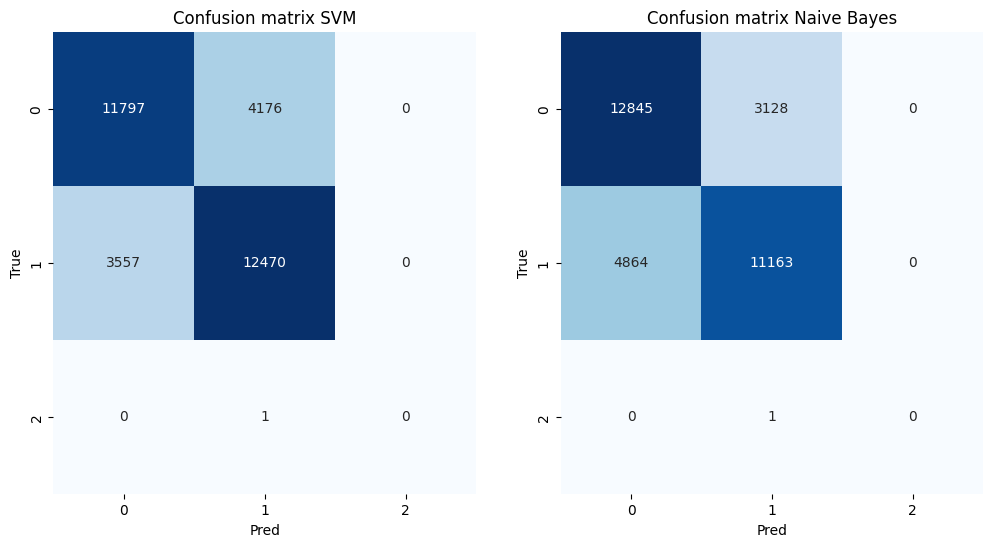

In [6]:

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

svm_cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', ax=ax[0], cmap=plt.cm.Blues, cbar=False)
ax[0].set(xlabel="Pred", ylabel="True", title="Confusion matrix SVM")

nb_cm = confusion_matrix(y_test, nb_y_pred)
sns.heatmap(nb_cm, annot=True, fmt='d', ax=ax[1], cmap=plt.cm.Blues, cbar=False)
ax[1].set(xlabel="Pred", ylabel="True", title="Confusion matrix Naive Bayes")

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


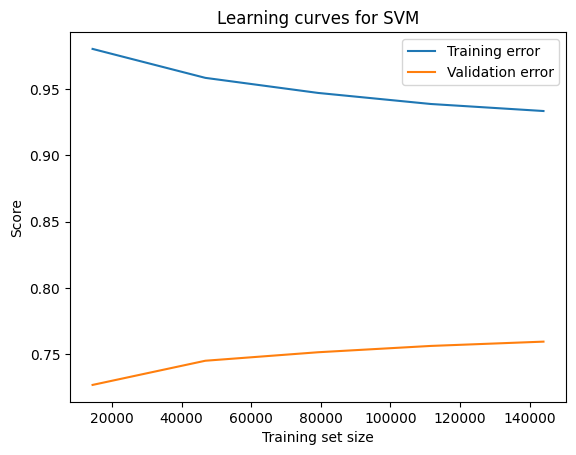

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


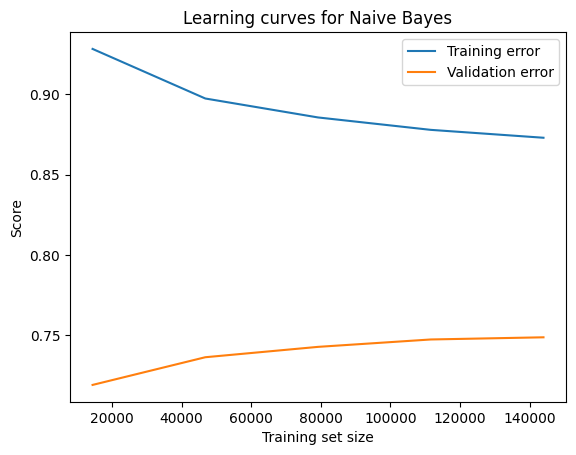

In [7]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('Score')
plt.xlabel('Training set size')
plt.title('Learning curves for SVM')
plt.legend()
plt.show()

train_sizes, train_scores, test_scores = learning_curve(nb_model, X, y, cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('Score')
plt.xlabel('Training set size')
plt.title('Learning curves for Naive Bayes')
plt.legend()
plt.show()
